# Desafio Yooga

Notebook com resolução do desafio técnico para o processo seletivo da empresa Yooga (Cargo: Analista de Dados).

In [1]:
# Importando bibliotecas

import pandas as pd
import plotly.express as px
from plotly import graph_objects as go
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import iplot
import numpy as np
import seaborn as sns
py.offline.init_notebook_mode(connected=True)

In [2]:
# Lendo dataset

df = pd.read_csv('/home/pedro/Desktop/challenge/pipe_comercial.csv')

## Funil com taxas de conversão (PIPES / Separados / Juntos)

### Funil com taxas de conversão (PIPES Separados)

Construção do gráfico de funil com taxas de conversão, por canal de Aquisição aplicando. Trabalharemos com PIPES Separados primeiramente.

In [3]:
# Construí uma função para otimização do processo de construção do gráfico

def funnel_separated(channel):
    prospectado1   = len(df[(df['channel']==str(channel))&((df['pipe_name']=='Inside-Sales')&((df['pipe_phases'] == 'Prospectado')|(df['pipe_phases']=='Trial')))])
    contactado1    = len(df[(df['channel']==str(channel))&(df['pipe_name']=='Inside-Sales')&(df['pipe_phases'] == 'Contactado')])
    interessado1   = len(df[(df['channel']==str(channel))&(df['pipe_name']=='Inside-Sales')&(df['pipe_phases'] == 'Interessado')])
    negociacao1    = len(df[(df['channel']==str(channel))&(df['pipe_name']=='Inside-Sales')&(df['pipe_phases'] == 'Negociação')])
    teste1         = len(df[(df['channel']==str(channel))&(df['pipe_name']=='Inside-Sales')&(df['pipe_phases'] == 'Teste')])
    won1           = len(df[(df['channel']==str(channel))&(df['pipe_name']=='Inside-Sales')&(df['pipe_phases'] == 'Won')])
    lost1          = len(df[(df['channel']==str(channel))&(df['pipe_name']=='Inside-Sales')&(df['pipe_phases'] == 'Lost')])


    prospectado2   = len(df[(df['channel']==str(channel))&(df['pipe_name']=='Self-Service')&((df['pipe_phases'] == 'Prospectado')|(df['pipe_phases']=='Trial'))])
    contactado2    = len(df[(df['channel']==str(channel))&(df['pipe_name']=='Self-Service')&(df['pipe_phases'] == 'Contactado')])
    interessado2   = len(df[(df['channel']==str(channel))&(df['pipe_name']=='Self-Service')&(df['pipe_phases'] == 'Interessado')])
    negociacao2    = len(df[(df['channel']==str(channel))&(df['pipe_name']=='Self-Service')&(df['pipe_phases'] == 'Negociação')])
    teste2         = len(df[(df['channel']==str(channel))&(df['pipe_name']=='Self-Service')&(df['pipe_phases'] == 'Teste')])
    won2           = len(df[(df['channel']==str(channel))&(df['pipe_name']=='Self-Service')&(df['pipe_phases'] == 'Won')])
    lost2          = len(df[(df['channel']==str(channel))&(df['pipe_name']=='Self-Service')&(df['pipe_phases'] == 'Lost')])

    stages = ["Prospectado ou Trial", "Contactado", "Interessado", "Negociação", "Teste", "Won", "Lost"]

    # Inside Sales 
    df1 = pd.DataFrame(dict(number=[prospectado1, contactado1, interessado1, negociacao1, teste1, won1, lost1], stage=stages))
    df1['Pipe'] = 'Inside Sales'

    # Self Service
    df2 = pd.DataFrame(dict(number=[prospectado2, contactado2, interessado2, negociacao2, teste2, won2, lost2], stage=stages))
    df2['Pipe'] = 'Self Service'

    # Prospectado ou Trial  >> Contactado >> Interessado >> Negociação >> Teste >> Won >> Lost

    df_total = pd.concat([df1, df2], axis=0)
    fig = px.funnel(df_total, x='number', y='stage', color='Pipe', title=str(channel))
    fig.show()


Os diferentes canais possiveis na análise são Franquias, Orgânico Direto, Indicação, Social Media, Facebook CPC e  Google CPC        

In [4]:
# Diferentes canais e suas frequencias

print(df['channel'].value_counts())

Franquias          157
Orgânico Direto    153
Not Set            148
Indicação          146
Social Media       139
Facebook CPC       135
Google CPC         122
Name: channel, dtype: int64


Gráficos para diferentes canais.


In [5]:
list = ['Franquias', 'Orgânico Direto', 'Indicação', 'Social Media', 'Facebook CPC', 'Google CPC']

for i in list:
    funnel_separated(i)



### Funil com taxas de conversão (PIPES Juntos)

Funil com taxas de conversão, por canal de Aquisição (PIPES Unidas)

In [6]:
# Construí uma função para otimização do processo de cosntrução do gráfico

def funnel_join(channel):
    prospectado = len(df[(df['channel']==str(channel))&((df['pipe_phases'] == 'Prospectado')|(df['pipe_phases']=='Trial'))])
    contactado  = len(df[(df['channel']==str(channel))&(df['pipe_phases'] == 'Contactado')])
    interessado = len(df[(df['channel']==str(channel))&(df['pipe_phases'] == 'Interessado')])
    negociacao  = len(df[(df['channel']==str(channel))&(df['pipe_phases'] == 'Negociação')])
    teste       = len(df[(df['channel']==str(channel))&(df['pipe_phases'] == 'Teste')])
    won         = len(df[(df['channel']==str(channel))&(df['pipe_phases'] == 'Won')])
    lost        = len(df[(df['channel']==str(channel))&(df['pipe_phases'] == 'Lost')])
    
    # Prospectado ou Trial  >> Contactado >> Interessado >> Negociação >> Teste >> Won >> Lost

    fig = go.Figure(go.Funnel(
        y = ["Prospectado ou Trial", "Contactado", "Interessado", "Negociação", "Teste", "Won", "Lost"],
        x = [prospectado, contactado, interessado, negociacao, teste, won, lost]), layout_title_text=str(channel))
        
    fig.show()

Importante salientar que a ferramenta abaixo, além de fornecer o gráfico funil também gera as taxas de conversão
para cada processo. Comparando os valores os valore de cada estado com o processo anterior, posterior e 
com o valor total em porcentagem. Para observá-lo, basta passar o mouse em cima.

In [7]:
list = ['Franquias', 'Orgânico Direto', 'Indicação', 'Social Media', 'Facebook CPC', 'Google CPC']

for i in list:
    funnel_join(i)

## Demografia básica

Cálculo da demografia básica associada a cada canal.

In [8]:
def age_plot(channel):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 4))
    ax1.hist(df['age'][df['gender']=='Male'][df['channel']==str(channel)], bins = [11, 21, 31, 41, 51, 61], rwidth=0.8, color='blue', alpha=0.5, label ='Male')
    ax1.set_ylabel("Frequency", fontsize=12)
    ax1.set_xlabel("Age", fontsize=12)
    ax1.set_title("Male", fontsize=12)
    
    ax2.hist(df['age'][df['gender']=='Female'][df['channel']==str(channel)], bins = [11, 21, 31, 41, 51, 61], rwidth=0.8, color='red', alpha=0.5, label ='Male')
    ax2.set_ylabel("Frequency", fontsize=12)
    ax2.set_xlabel("Age", fontsize=12)
    _ = ax2.set_title("Female", fontsize=12)

    # Set the ticks and ticklabels for all axes
    plt.setp((ax1,ax2), xticks=[15, 25, 35, 45, 55], xticklabels=['<20','20-30','31-40','41-50','51-60'])#,  yticks=[1, 2, 3])
    #plt.title(str(channel))
    fig.suptitle(str(channel), fontsize=16)
    plt.show()

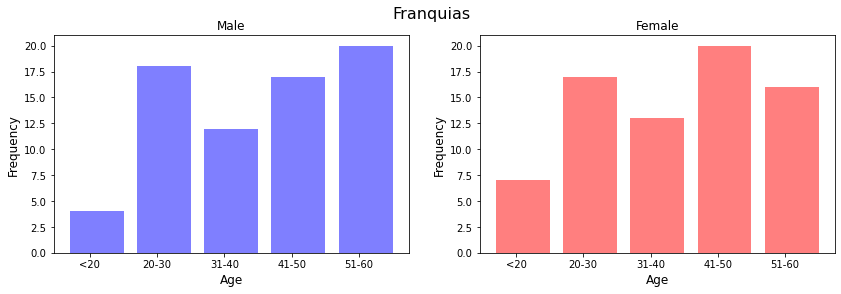

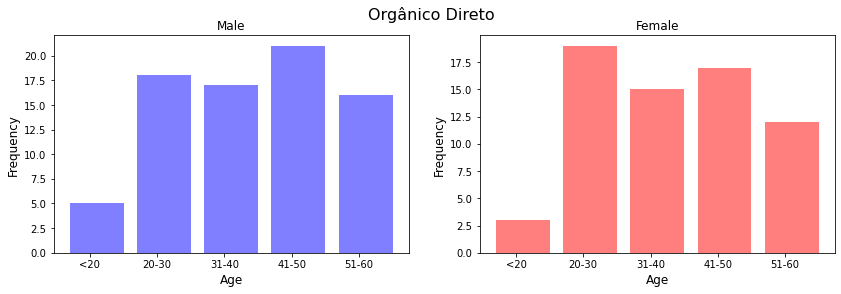

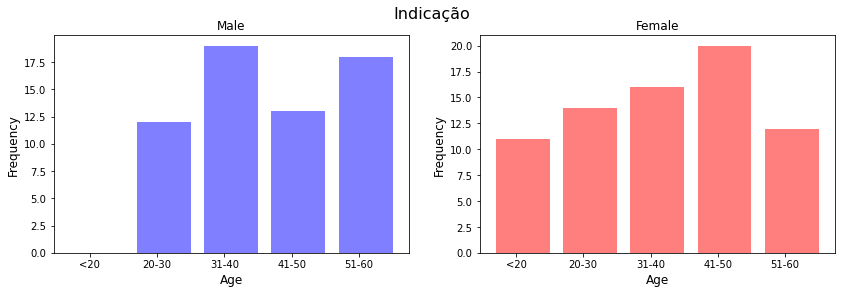

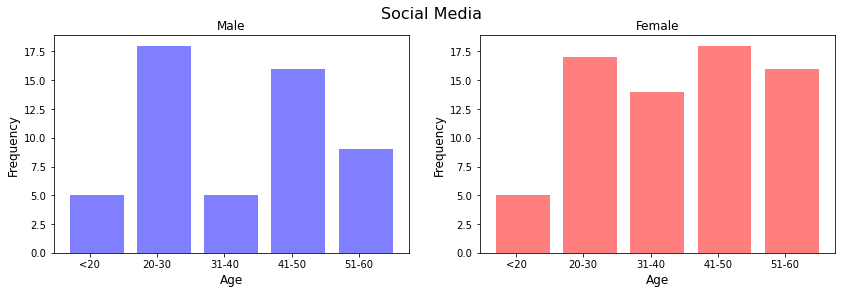

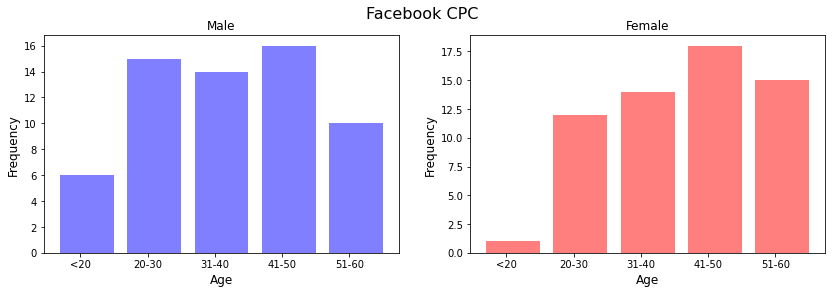

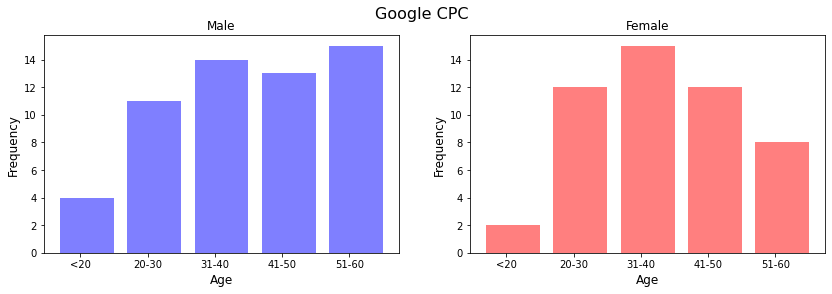

In [9]:
list = ['Franquias', 'Orgânico Direto', 'Indicação', 'Social Media', 'Facebook CPC', 'Google CPC']

for i in list:
    age_plot(i)

Cálculo das taxas CPL, CAC, ROAS para os canais Facebook CPC e Google CPC. Calcularemos as três quantidades somente com as taxas de mídia.

Definições:

- Custo por Lead (CPL) =  Total gasto com a captação dos leads / Número de leads captados
- Custo de Aquisição de Clientes (CAC) = custos com marketing e vendas / número de novos clientes
- Return on advertising spend (ROAS) = (Retorno conseguido com os anúncios pagos / Custos publicitários envolvidos) x 100

Para o Facebook CPC e Google CPC assumiremos os valores de campanha publicitária de 5065.01 e 6177.53 dólares respectivamente.

Nas análises abaixo não distinguimos Insides Sales ou Self Service.

In [10]:

# CPL Facebook
CPL_face   = 5065.01/38 

# CPL Google
CPL_google = 6177.53/33 


# CAC Facebook
CAC_face   = 5065.01/16

# CAC Google
CAC_google = 6177.53/9


# ROAS Facebook
#ROAS_face   = (Receita – 5065.01)/5065.01

# ROAS Google
#ROAS_google = (Receita – 6177.53)/6177.53


In [11]:
print('CPL Facebook = %2.f dolares' % CPL_face)
print('CPL Google = %2.f dolares' % CPL_google)

print('CAC Facebook = %2.f dolares' % CAC_face)
print('CAC Google = %2.f dolares' % CAC_google)

CPL Facebook = 133 dolares
CPL Google = 187 dolares
CAC Facebook = 317 dolares
CAC Google = 686 dolares


In [12]:
# Qual setor fechou com mais clientes ?

### Modelo de negocio

Funil com taxas de conversão, divididos por modelo de negócio.

In [13]:
# Possiveis valores para modelo de negócio
print(df['business_model'].value_counts())

Açaiteria                   141
Doceria                     132
Bar                         117
Pizzaria                    110
Lanchonete                  108
Sorveteria                  107
Hamburgueria                100
Comida Fitness               93
Distribuidora de Bebidas     92
Name: business_model, dtype: int64


In [14]:
# Construí uma função para otimização do processo de construção do gráfico

def funnel_join_business(model):
    prospectado = len(df[(df['business_model']==str(model))&((df['pipe_phases'] == 'Prospectado')|(df['pipe_phases']=='Trial'))])
    contactado  = len(df[(df['business_model']==str(model))&(df['pipe_phases'] == 'Contactado')])
    interessado = len(df[(df['business_model']==str(model))&(df['pipe_phases'] == 'Interessado')])
    negociacao  = len(df[(df['business_model']==str(model))&(df['pipe_phases'] == 'Negociação')])
    teste       = len(df[(df['business_model']==str(model))&(df['pipe_phases'] == 'Teste')])
    won         = len(df[(df['business_model']==str(model))&(df['pipe_phases'] == 'Won')])
    lost        = len(df[(df['business_model']==str(model))&(df['pipe_phases'] == 'Lost')])
    
    # Prospectado ou Trial  >> Contactado >> Interessado >> Negociação >> Teste >> Won >> Lost

    fig = go.Figure(go.Funnel(
        y = ["Prospectado ou Trial", "Contactado", "Interessado", "Negociação", "Teste", "Won", "Lost"],
        x = [prospectado, contactado, interessado, negociacao, teste, won, lost]), layout_title_text=str(model))
        
    fig.show()

In [15]:
list = ['Açaiteria', 'Doceria', 'Bar', 'Pizzaria', 'Lanchonete', 'Sorveteria', 'Hamburgueria', 'Comida Fitness', 'Distribuidora de Bebidas']

for i in list:
    funnel_join_business(i)  
    

## Comentários gerais

O objetivo dessa seção é identificar/comentar qual o setor e canal que fechamos mais clientes. De uma maneira geral, o canal que maior gerou clientes foi o Facebook CPC com 13.4% enquanto o Google CPC ocupou a última posição com 7.9%. O setor que fechou com mais clientes foi comida fitness e lachonete  com 14.6% e 12.4% de clientes. A sorveteria ocupou a última posição com 8.5%. Com Pipes unidas (Self service + Inside Sales) podemos encontrar a distribuição de clientes adiquiridos comparados aos Prospectados/Trial.

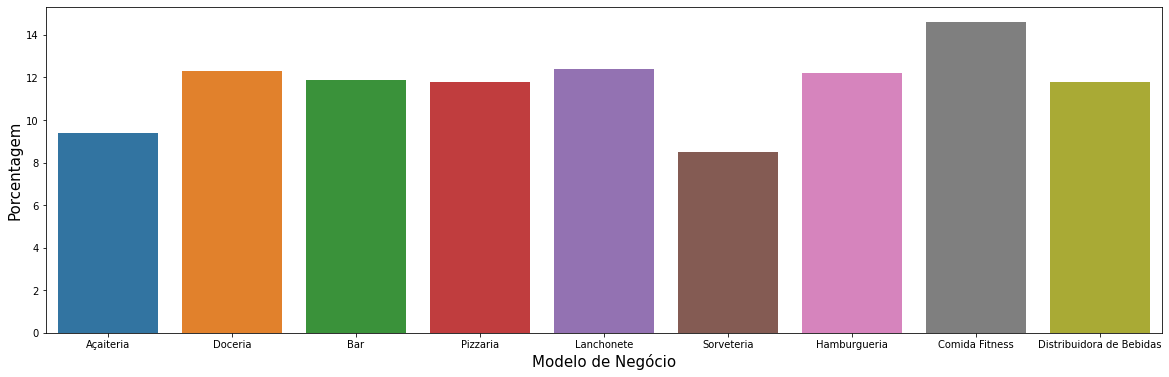

In [16]:
# Dataframe
business_model = {"business": ['Açaiteria', 'Doceria', 'Bar', 'Pizzaria', 'Lanchonete', 'Sorveteria', 'Hamburgueria', 'Comida Fitness', 'Distribuidora de Bebidas'],
        "percentage": [9.4, 12.3, 11.9, 11.8, 12.4, 8.5, 12.2, 14.6, 11.8]}

df3 = pd.DataFrame(business_model, columns=['business', 'percentage'])

plt.figure(figsize=(20, 6))
plots = sns.barplot(x="business", y="percentage", data=df3)
plt.xlabel("Modelo de Negócio", size=15)
plt.ylabel("Porcentagem", size=15)
plt.show()


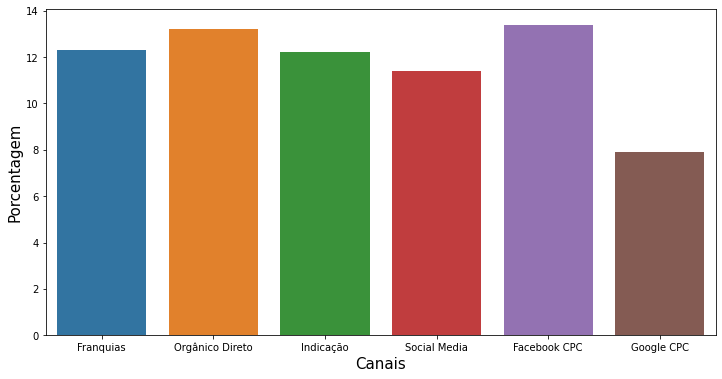

In [17]:
# Dataframe
channel = {"channel": ['Franquias', 'Orgânico Direto', 'Indicação', 'Social Media', 'Facebook CPC', 'Google CPC'],
        "percentage": [12.3, 13.2, 12.2, 11.4, 13.4, 7.9]}

df4 = pd.DataFrame(channel, columns=['channel', 'percentage'])

plt.figure(figsize=(12, 6))
plots = sns.barplot(x="channel", y="percentage", data=df4)
plt.xlabel("Canais", size=15)
plt.ylabel("Porcentagem", size=15)
plt.show()